<a href="https://colab.research.google.com/github/juDEcorous/ML-Regression/blob/main/Core_Logistic%2C_Random_Forest%2C_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the Wisconsin Breast Cancer Dataset, predict whether a tumor cell is malignant (m) or benign (b).

Your task in this assignment will be to build the best model you can to diagnose cancer and report on your results.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path = '/content/drive/MyDrive/Datas/wisconsinBreastCancer - wisconsinBreastCancer.csv'
df = pd.read_csv(path, index_col = 'id') 

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.diagnosis.value_counts(normalize = 'true')) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [ ]:
df.diagnosis = df.diagnosis.replace({'B' : 0, 'M' : 1})
df.diagnosis.value_counts(normalize = 'true') * 100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [ ]:
target = 'diagnosis'
y = df[target]
X = df.drop(columns = target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
def estimator(model, X_train, X_test, y_train, y_test, name = 'name'):
  model.fit(X_train, y_train)
  model_test_pred = model.predict(X_test)
  model_class_report = classification_report(y_test, model_test_pred)
  print(name)
  print(model_class_report)

  cm = confusion_matrix(y_test, model_test_pred, normalize = 'true')
  disp = ConfusionMatrixDisplay(confusion_matrix = cm)
  disp.plot()
  disp.ax_.set_title(name)

#Logistic Regression

a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.


In [ ]:
scaler = StandardScaler()
logreg = LogisticRegression()

logistic_pipe = make_pipeline(scaler, logreg)

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



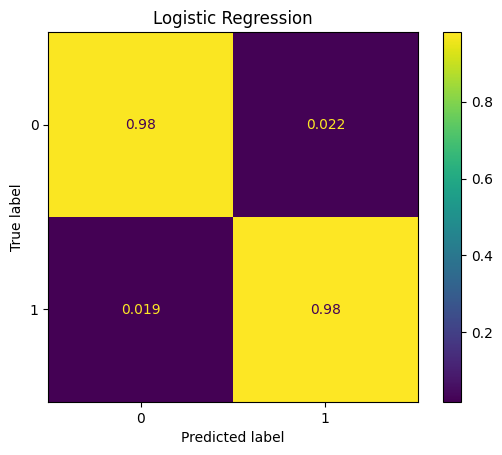

In [ ]:
estimator(logistic_pipe, X_train, X_test, y_train, y_test, name = 'Logistic Regression')


# Tuned Logistic Regression


b) Then, use GridSearchCV to tune the penalty type and C values (inverse regularization strength) for the model to find the optimal combination of hyperparameter values, and evaluate the resulting tuned model.

NOTE: Make sure to select an appropriate solver that would allow you to explore both L1 and L2 penalties. In order to choose the right solver, LogisticRegression documentation to see which solvers support which penalty types.

When you create your parameter dictionary:

Your penalties should be ['l1', 'l2']
Your C values should be logarithmic: [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]




***"The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty."***

In [ ]:
logreg_tuned = LogisticRegression(solver = 'liblinear')
logreg_param_grid = {'penalty': ['l1', 'l2'],
                     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [ ]:
logreg_grid_search = GridSearchCV(logreg_tuned, logreg_param_grid)
logreg_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [ ]:
logreg_grid_search.best_params_

{'C': 100, 'penalty': 'l1'}

In [ ]:
logreg_tuned = logreg_grid_search.best_estimator_
logreg_tuned

LogisticRegression(C=100, penalty='l1', solver='liblinear')

Logistic Regression Tuned
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        89
           1       0.87      0.98      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



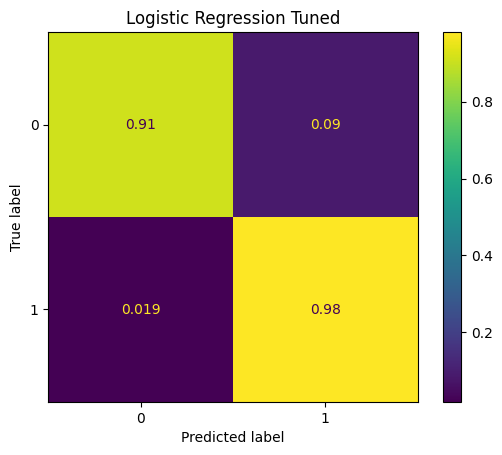

In [ ]:
logreg_tuned_pipe = make_pipeline(scaler, logreg_tuned)
estimator(logreg_tuned_pipe, X_train, X_test, y_train, y_test, name = 'Logistic Regression Tuned')

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

- In the Tuned Confusion Matrix theres an elevation in the False Positives.
- Higher Accuracy in untuned Logistic Regression noted.

d) In a text cell, address these questions for your logistic regression models:

Which hyperparameters did you tune?
- C and penalty has been used to tune the model

What values for those hyperparameters led to the best-tuned model?
- Best values for the tuned model using the Grid Search is 'C' of 100 and 'penalty' of L1


#k-nearest neighbors

a) Start by creating and evaluating a default knn model using appropriate metrics and a confusion matrix



KNearest neighbors Regression
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



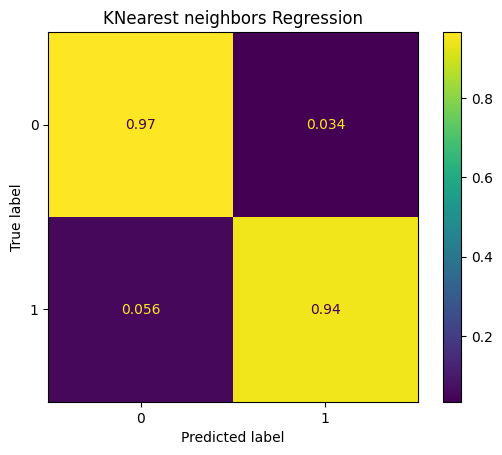

In [ ]:
knn = KNeighborsClassifier()
knn_pipe =  make_pipeline(scaler, knn)
estimator(knn_pipe, X_train, X_test, y_train, y_test, name = 'KNearest neighbors Regression')

b) The, use GridSearchCV to tune the model.

Check the KNN documentation to choose hyperparameters to tune. 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Tuned K-nearest Neighbors

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_tuned = KNeighborsClassifier()

In [ ]:
knn_param = {'n_neighbors': list(range(1, 31)),
             'leaf_size': [1, 10, 20, 30, 40, 50],
             'p': [1, 2]}

In [ ]:
knn_grid_search = GridSearchCV(knn_tuned, knn_param)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]})

In [ ]:
knn_grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}

In [ ]:
knn_tuned_model = knn_grid_search.best_estimator_
knn_tuned_model

KNeighborsClassifier(leaf_size=1, p=1)

KNN Regression Tuned
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



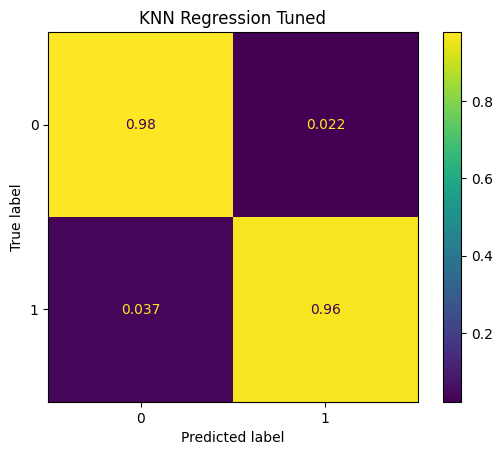

In [ ]:
knn_tuned_pipe = make_pipeline(scaler, knn_tuned_model)
estimator(knn_tuned_pipe, X_train, X_test, y_train, y_test, name = 'KNN Regression Tuned')

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

- Surprsingly even at 'n_neighbors': 7 there's no difference in our Confussion Metrix between the tuned and untuned k-neighbors.

d) In a text cell, address these questions for your KNN models:

Which hyperparameters did you tune?
- 'p', leaf_size', 'n_neighbors' are the parameters used to tuned the model

What values for those hyperparameters led to the best-tuned model?
- 'leaf_size': 1, 'p': 1, 'n_neighbors': 5
- leaf_size:1 and p:1 are the default

#Random Forest

a) Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix



Random Forest Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



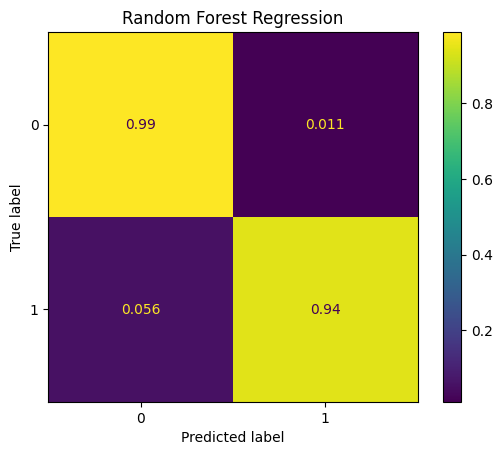

In [ ]:
ranfor = RandomForestClassifier()
ran_for = make_pipeline(scaler, ranfor)
estimator(ran_for, X_train, X_test, y_train, y_test, name = 'Random Forest Regression')

# Tuned Ranon Forest

b) The, use GridSearchCV to tune the model.

Check the random forest documentation to choose hyperparameters to tune. 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#:~:text=A%20random%20forest%20regressor.,accuracy%20and%20control%20over%2Dfitting.


In [ ]:
ranfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
ranfor_tuned = RandomForestClassifier()

In [ ]:
ranfor_params = {'n_estimators': list(range(10, 110, 10)),
                 'max_depth': list(range(1, 11))

}

In [ ]:
ranfor_grid_search = GridSearchCV(ranfor_tuned, ranfor_params)
ranfor_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [ ]:
ranfor_grid_search.best_params_

{'max_depth': 7, 'n_estimators': 50}

In [ ]:
ranfor_grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=50)

Random Forest Tuned
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



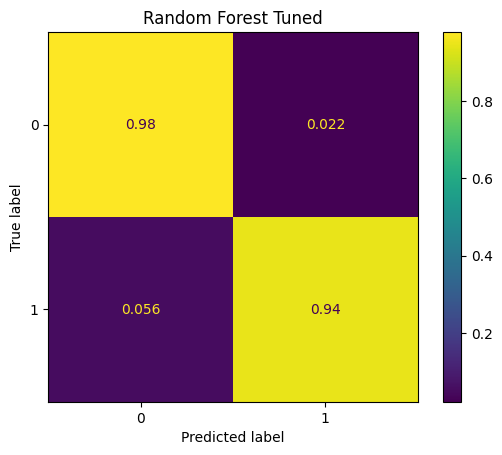

In [ ]:
ranfor_tuned_pipe = make_pipeline(scaler, ranfor_tuned)
estimator(ranfor_tuned_pipe, X_train, X_test, y_train, y_test, name = 'Random Forest Tuned')

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.
- The Defalut Random Forest, has lower False Positives than the Tuned RF.
- Both have the same accuracy.

d) In a text cell, address these questions for your random forest models:

Which hyperparameters did you tune?
- N_estimators and amx_depth are used to tune.

What values for those hyperparameters led to the best-tuned model?
- {'max_depth': 7, 'n_estimators': 50} is the best tuned model

# Answer these questions in a text cell at the end of your notebook:

What do 'false positives' and 'false negatives' mean for this problem? Which is worse?
Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?

Considering our data has:
1. Malignant (1) Positive
2. Benight (0) Negative

False Positives means that the patient was predicted to have Malignant Tumor but is Benign </br>
False Negative means that the patient was predicted to have Benight Tumor but is Malignant.

False Positive is much better in this dataset. </br>
False Negative is the **WORST**

I would Recommend using the Logistic Regression for this data set. This is because it has the lowest False Negatives on Confussion Matrics (since I want the least False Negatives(worst)). Another thing to note is that in classification report it has the highest accuracy amongs all the model used. Logistic Regression also have the most balanced and highest Recall (both 98%) in all our data set which means there's a posibility that we can reduce the false negatives further. 